In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.decomposition import PCA
import warnings 
from sklearn import metrics
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [2]:
data=pd.read_csv(r'E:\DS FILES\Wine_clust.csv')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
data.shape

(178, 13)

In [5]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [7]:
data['Malic_Acid'].unique()

array([1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.87, 2.15, 1.64, 1.35, 2.16,
       1.48, 1.73, 1.81, 1.92, 1.57, 1.59, 3.1 , 1.63, 3.8 , 1.86, 1.6 ,
       2.05, 1.77, 1.72, 1.9 , 1.68, 1.5 , 1.66, 1.83, 1.53, 1.8 , 1.65,
       3.99, 3.84, 1.89, 3.98, 4.04, 3.59, 2.02, 1.75, 1.67, 1.7 , 1.97,
       1.43, 0.94, 1.1 , 1.36, 1.25, 1.13, 1.45, 1.21, 1.01, 1.17, 1.19,
       1.61, 1.51, 1.09, 1.88, 0.9 , 2.89, 0.99, 3.87, 0.92, 3.86, 0.89,
       0.98, 2.06, 1.33, 2.83, 1.99, 1.52, 2.12, 1.41, 1.07, 3.17, 2.08,
       1.34, 2.45, 2.55, 1.29, 3.74, 2.43, 2.68, 0.74, 1.39, 1.47, 3.43,
       2.4 , 4.43, 5.8 , 4.31, 2.13, 4.3 , 2.99, 2.31, 3.55, 1.24, 2.46,
       4.72, 5.51, 2.96, 2.81, 2.56, 4.95, 3.88, 3.57, 5.04, 4.61, 3.24,
       3.9 , 3.12, 2.67, 3.3 , 5.19, 4.12, 3.03, 3.83, 3.26, 3.27, 3.45,
       2.76, 4.36, 3.7 , 3.37, 2.58, 4.6 , 2.39, 2.51, 5.65, 3.91, 4.28,
       4.1 ])

In [8]:
# unique value counts

data.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
dtype: int64

In [9]:
data.sort_values("Alcohol",ascending=False).head(10) # highest - lowest alcohol values

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
13,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
46,14.38,3.59,2.28,16.0,102,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065
14,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
158,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660
16,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
56,14.22,1.70,2.30,16.3,118,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970


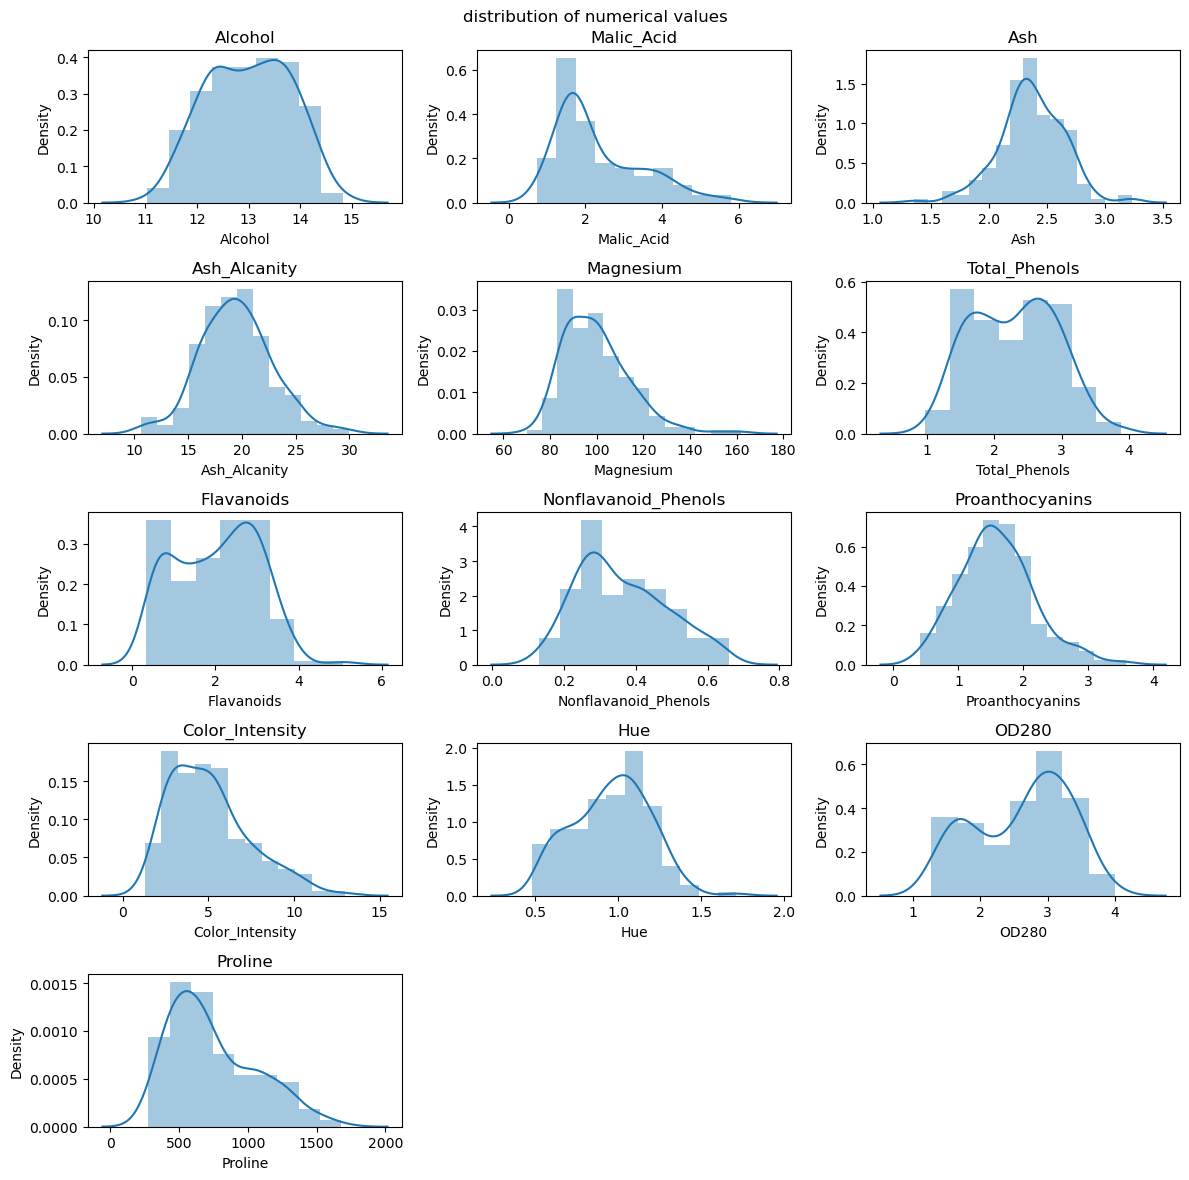

In [10]:
k=1
plt.figure(figsize=(12,12))
plt.suptitle("distribution of numerical values")


for i in data:
    plt.subplot(5,3,k)   
    sns.distplot(data[i])
    plt.title(i)
    plt.tight_layout()
    k+=1

In [11]:
data[data.Color_Intensity==13]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
158,14.34,1.68,2.7,25.0,98,2.8,1.31,0.53,2.7,13.0,0.57,1.96,660


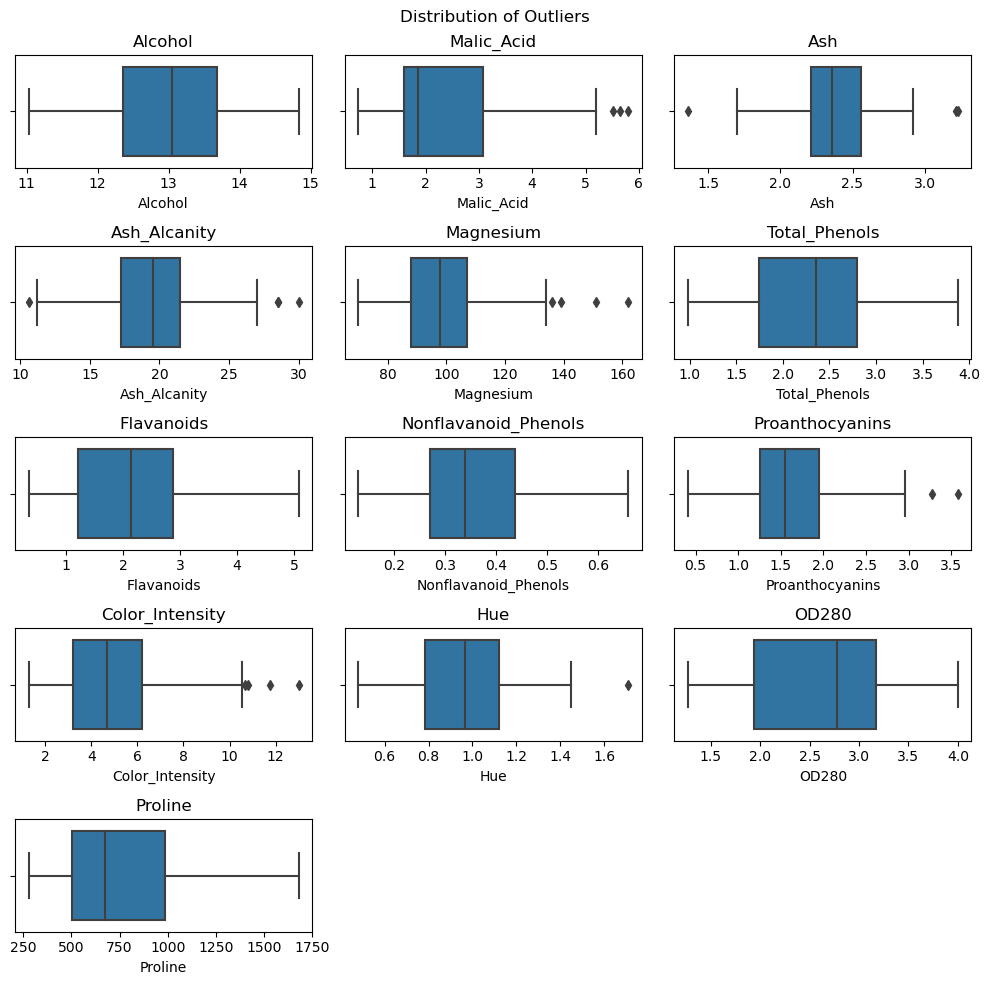

In [12]:
k=1
plt.figure(figsize=(10,10))
plt.suptitle("Distribution of Outliers")

for i in data:
    plt.subplot(5,3,k)
    sns.boxplot(x = i, data = data)
    plt.title(i)
    plt.tight_layout()
    k+=1

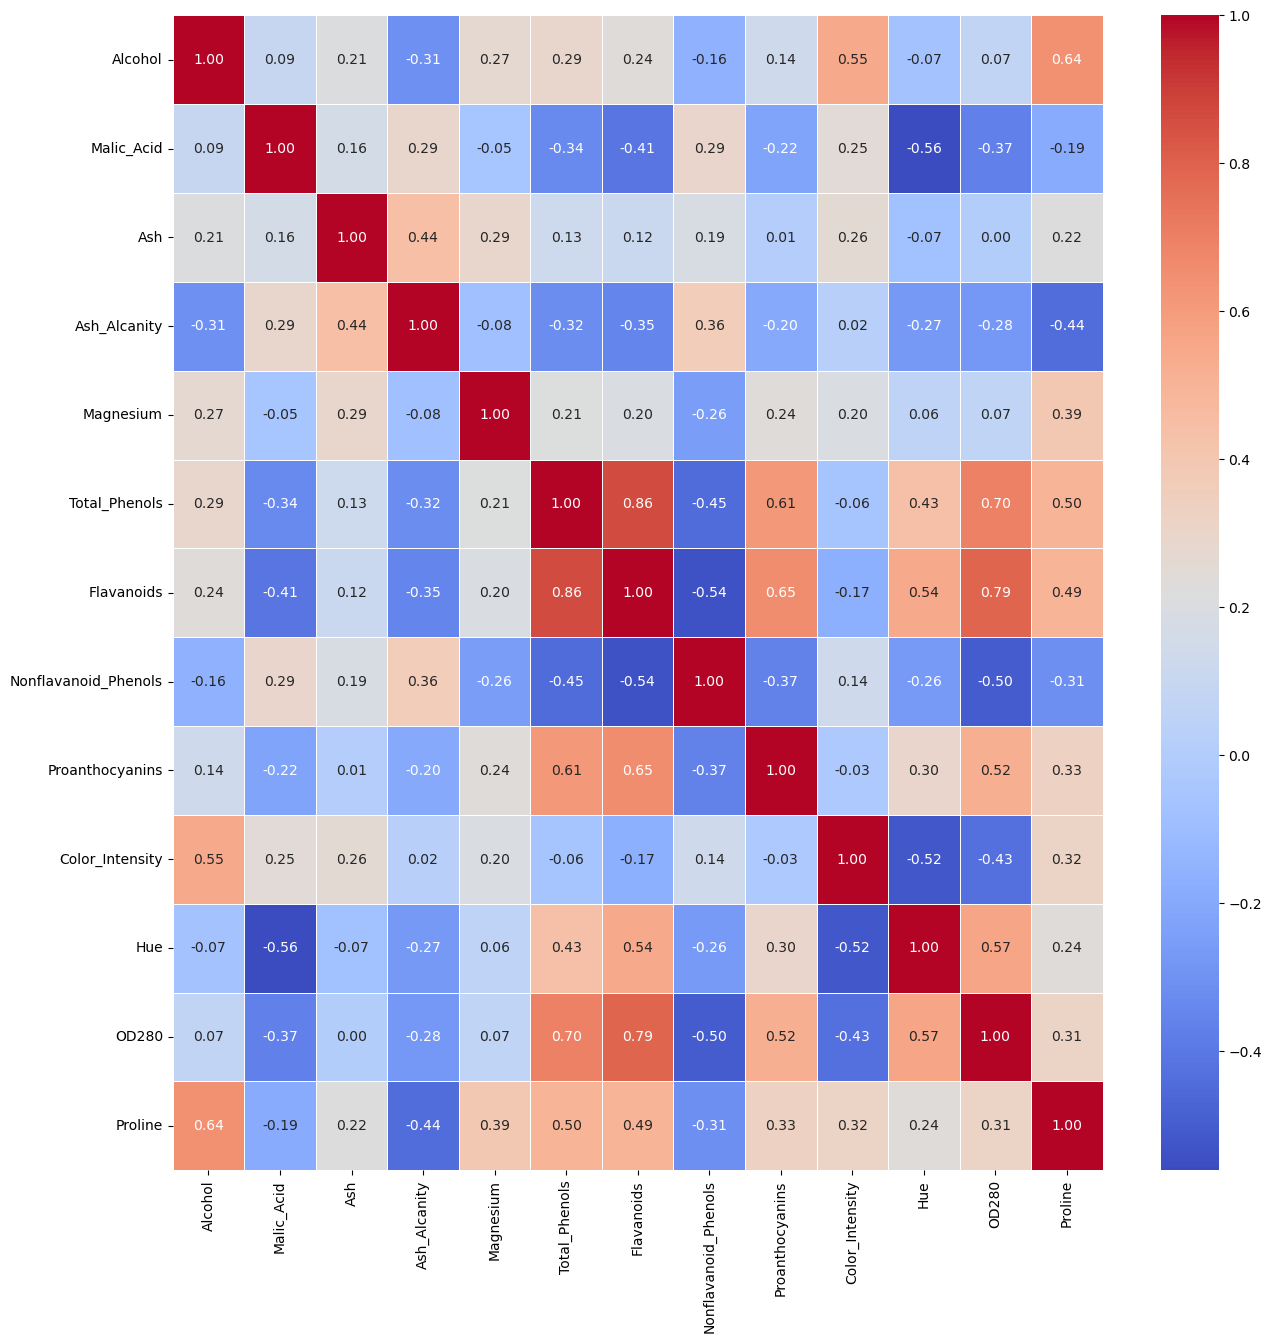

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,fmt=".2f",linewidths=0.7,cmap="coolwarm")
plt.show()

In [14]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler(feature_range=(0,1))
X=minmax.fit_transform(data)


In [15]:
X=pd.DataFrame(X,columns=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols','Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'])
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [16]:
pca = PCA(2, random_state=42)  # Principal Component Analysis of a dataset is the direction along the dataset with the highest variation.
wine_pca = pca.fit_transform(X)
projection = pd.DataFrame(columns=['x','y'], data=wine_pca)
projection


,x,y
0,-0.706336,-0.253193
1,-0.484977,-0.008823
2,-0.521172,-0.189187
3,-0.821644,-0.580906
4,-0.202546,-0.059467
...,...,...
173,0.739510,-0.471901
174,0.581781,-0.348366
175,0.626313,-0.546857
176,0.572991,-0.425516


# K MEANS CLUSTERING


#finding optimum cluster

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


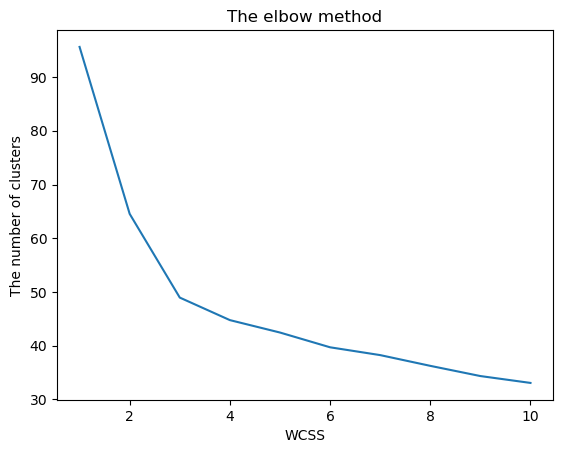

In [17]:
from sklearn.cluster import KMeans
wcss=[] # list
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)# to cal the wcss value and append it 
plt.plot(range(1,11),wcss)
plt.title("The elbow method")
plt.ylabel('The number of clusters')
plt.xlabel('WCSS')
plt.show()

In [18]:
#!pip install yellowbrick

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


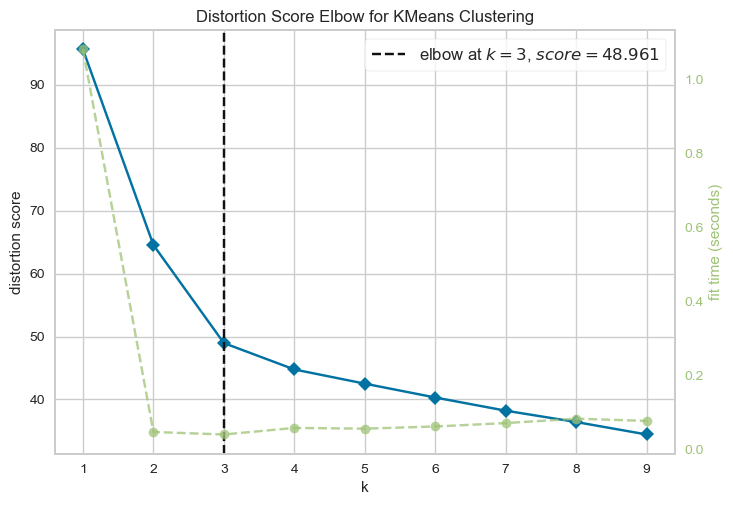

In [19]:
from yellowbrick.cluster import KElbowVisualizer
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(1,10))
visualizer.fit(X)
visualizer.poof()
plt.show()

In [20]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [21]:
from sklearn.metrics import silhouette_score
y_kmeans_sil_avg=silhouette_score(X,y_kmeans)
y_kmeans_sil_avg

0.3008938518500134

In [22]:

df= pd.DataFrame(y_kmeans)
df.columns= ["Kmean_cluster"]
df


,Kmean_cluster
0,2
1,2
2,2
3,2
4,2
...,...
173,1
174,1
175,1
176,1


In [23]:
df.Kmean_cluster.value_counts()

0    62
2    61
1    55
Name: Kmean_cluster, dtype: int64

In [24]:
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(projection)

#projection['cluster_pca'] = kmeans.predict(projection)

KMeans(n_clusters=3, random_state=42)

In [25]:
centroids = kmeans.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

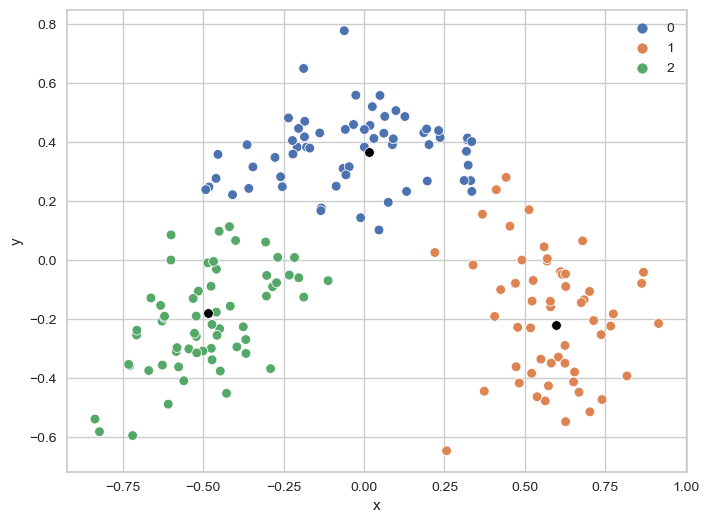

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=projection, x='x', y='y', hue=df["Kmean_cluster"],palette="deep")
sns.scatterplot(x=centroids_x, y=centroids_y, marker='o', c=['black']);

for n_clusters in range(2, 8):
    clusterer = KMeans(n_clusters=n_clusters,random_state=42)
    preds = clusterer.fit_predict(projection[['x', 'y']])
    centers = clusterer.cluster_centers_

    score = metrics.silhouette_score(projection[['x', 'y']], preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

metrics.silhouette_score(projection[['x', 'y']], projection['cluster_pca'])

In [27]:
pca.explained_variance_ratio_.sum()

0.5971983633884049

In [28]:
pca.explained_variance_.sum()

0.3225530367554641

# Agglomerative Hierarchical algorithmer 


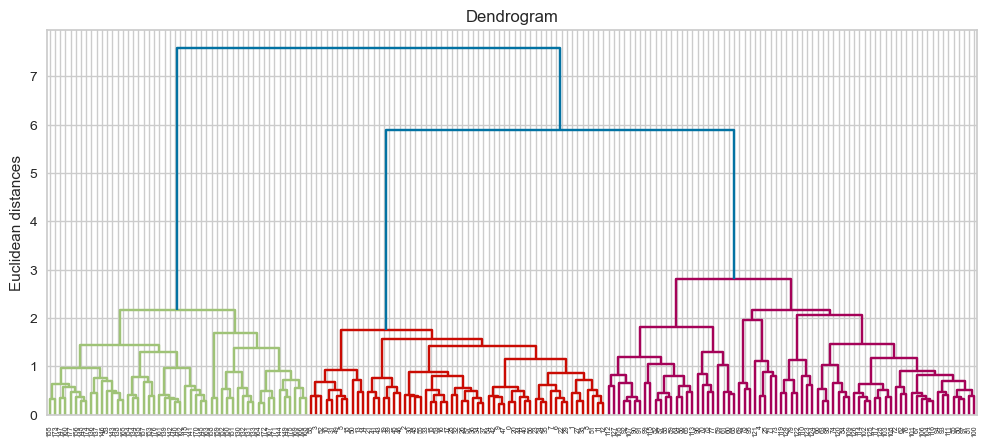

In [29]:
plt.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

In [30]:
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
Agglomerative_Cluster= hc.fit_predict(X)  
Agglomerative_Cluster

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [31]:
from sklearn.metrics import silhouette_score
Agglomerative_Cluster_sil_avg=silhouette_score(X,Agglomerative_Cluster)
Agglomerative_Cluster_sil_avg

0.2948290632158541

In [32]:
df["Agglomerative_Cluster"]= pd.DataFrame(Agglomerative_Cluster)
df

,Kmean_cluster,Agglomerative_Cluster
0,2,2
1,2,2
2,2,2
3,2,2
4,2,0
...,...,...
173,1,1
174,1,1
175,1,1
176,1,1


In [33]:
df.Agglomerative_Cluster.value_counts()

0    71
2    57
1    50
Name: Agglomerative_Cluster, dtype: int64

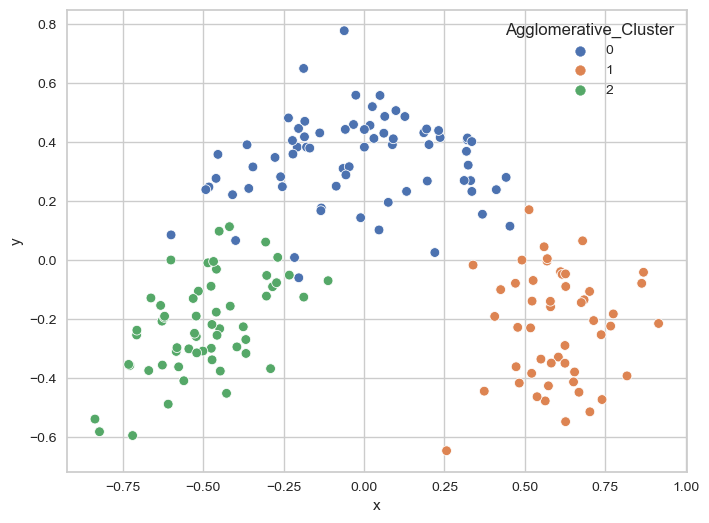

In [34]:
plt.figure(figsize=(8,6)) 
sns.scatterplot(data=projection, x='x', y='y', hue=df["Agglomerative_Cluster"],palette="deep");



# DBSCAN Algorithm

In [35]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=10,metric='euclidean')

In [36]:
model=db.fit(X)
DBSCAN_cluster=model.labels_
DBSCAN_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [37]:
df["DBSCAN_cluster"]= pd.DataFrame(DBSCAN_cluster)
df

,Kmean_cluster,Agglomerative_Cluster,DBSCAN_cluster
0,2,2,0
1,2,2,0
2,2,2,0
3,2,2,0
4,2,0,0
...,...,...,...
173,1,1,0
174,1,1,0
175,1,1,0
176,1,1,0


In [38]:
df.DBSCAN_cluster.value_counts()

0    178
Name: DBSCAN_cluster, dtype: int64

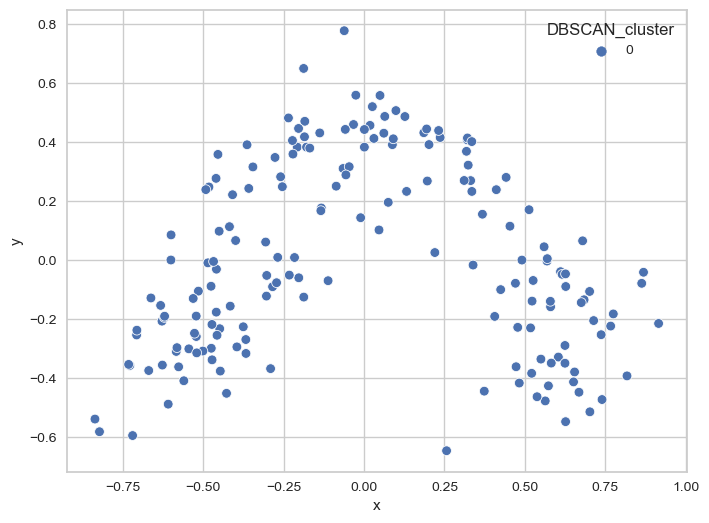

In [39]:
plt.figure(figsize=(8,6)) 
sns.scatterplot(data=projection, x='x', y='y', hue=df["DBSCAN_cluster"],palette="deep");

# Gaussian Mixture Model

In [40]:

from sklearn.mixture import GaussianMixture

Gaussian_model = GaussianMixture(n_components=3)

Gaussian_model.fit(X)  # fit the model

Gaussian_cluster = Gaussian_model.predict(X) # assign a cluster to each example

Gaussian_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [41]:
Gaussian_cluster_sil_avg=silhouette_score(X,Gaussian_cluster)
Gaussian_cluster_sil_avg

0.2962530654753313

In [42]:
df["Gaussian_cluster"]= pd.DataFrame(Gaussian_cluster)
df

,Kmean_cluster,Agglomerative_Cluster,DBSCAN_cluster,Gaussian_cluster
0,2,2,0,1
1,2,2,0,1
2,2,2,0,1
3,2,2,0,1
4,2,0,0,1
...,...,...,...,...
173,1,1,0,2
174,1,1,0,2
175,1,1,0,2
176,1,1,0,2


In [43]:
df.Gaussian_cluster.value_counts()

0    65
1    63
2    50
Name: Gaussian_cluster, dtype: int64

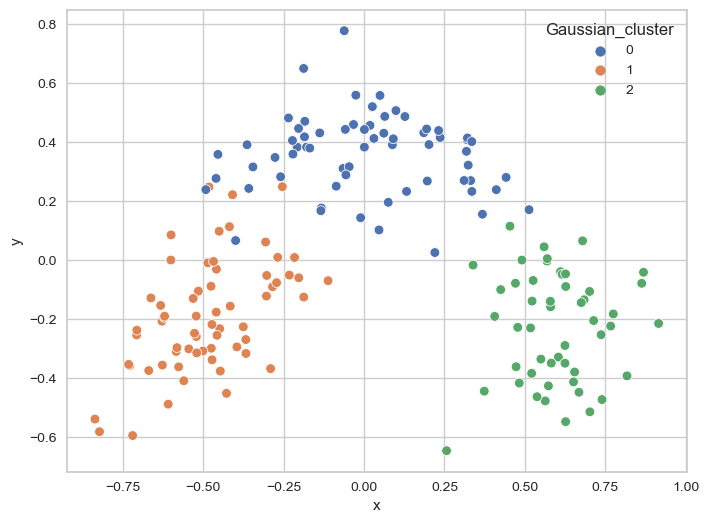

In [44]:
plt.figure(figsize=(8,6)) 
sns.scatterplot(data=projection, x='x', y='y', hue=df["Gaussian_cluster"],palette="deep");


# Mean-shift algorithm

In [45]:
from sklearn.cluster import MeanShift
model = MeanShift()
Meanshift_cluster = model.fit_predict(X)
Meanshift_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [46]:
df["Meanshift_cluster"]= pd.DataFrame(Meanshift_cluster)
df

,Kmean_cluster,Agglomerative_Cluster,DBSCAN_cluster,Gaussian_cluster,Meanshift_cluster
0,2,2,0,1,0
1,2,2,0,1,0
2,2,2,0,1,0
3,2,2,0,1,0
4,2,0,0,1,0
...,...,...,...,...,...
173,1,1,0,2,0
174,1,1,0,2,0
175,1,1,0,2,0
176,1,1,0,2,0


In [47]:
df.Meanshift_cluster.value_counts()

0    178
Name: Meanshift_cluster, dtype: int64

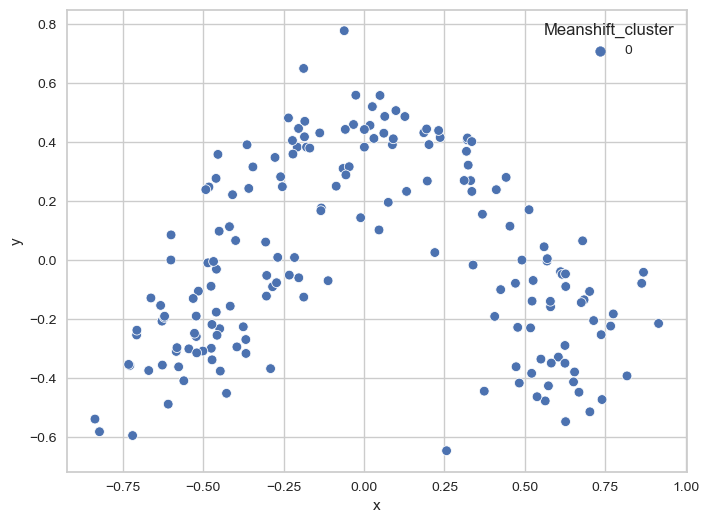

In [48]:
plt.figure(figsize=(8,6)) 
sns.scatterplot(data=projection, x='x', y='y', hue=df["Meanshift_cluster"],palette="deep");

# Affinity Propagation

In [49]:
from sklearn.cluster import AffinityPropagation
model = AffinityPropagation(damping=0.9)
model.fit(X)
Affinity_cluster= model.predict(X)
Affinity_cluster

array([ 2,  1,  2,  0,  2,  0,  1,  2,  1,  2,  0,  1,  1,  0,  0,  1,  0,
        0,  0,  2,  2,  2,  2,  2,  2,  2,  1,  1,  2,  2,  1,  1,  1,  0,
        2,  2,  2,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  0,  1,
        1,  0,  0,  2,  2,  2,  1,  0,  3,  3,  3,  6,  6,  5,  6,  6,  6,
        3,  4, 11,  2,  7,  2,  2,  6,  6,  5,  4,  7,  6,  6,  5, 10,  6,
        6,  5,  5,  5,  5,  5,  5,  5,  6,  6,  4,  8,  6,  6,  6,  6,  6,
        7,  7,  7,  5,  7,  5,  7,  7,  7,  7,  5,  5,  7,  5,  7,  7, 11,
        7,  7,  7,  7,  7,  7,  7,  7,  5,  7,  5,  8,  8,  8,  8,  3, 10,
       11, 10, 10, 10, 10, 11, 10, 11, 11, 11, 11,  9,  9,  9,  8,  8,  8,
        9,  9,  9,  9, 10,  9,  9,  9, 10, 10, 11,  9,  9,  9,  9,  9,  9,
       11,  9,  9,  9,  9,  9,  9,  9], dtype=int64)

In [50]:
Affinity_cluster_sil_avg=silhouette_score(X,Affinity_cluster)
Affinity_cluster_sil_avg

0.11220033737835665

In [51]:
df["Affinity_cluster"]= pd.DataFrame(Affinity_cluster)
df

,Kmean_cluster,Agglomerative_Cluster,DBSCAN_cluster,Gaussian_cluster,Meanshift_cluster,Affinity_cluster
0,2,2,0,1,0,2
1,2,2,0,1,0,1
2,2,2,0,1,0,2
3,2,2,0,1,0,0
4,2,0,0,1,0,2
...,...,...,...,...,...,...
173,1,1,0,2,0,9
174,1,1,0,2,0,9
175,1,1,0,2,0,9
176,1,1,0,2,0,9


In [52]:
df.Affinity_cluster.value_counts()

2     32
9     23
7     22
6     18
1     17
5     17
0     13
11    10
10    10
8      8
3      5
4      3
Name: Affinity_cluster, dtype: int64

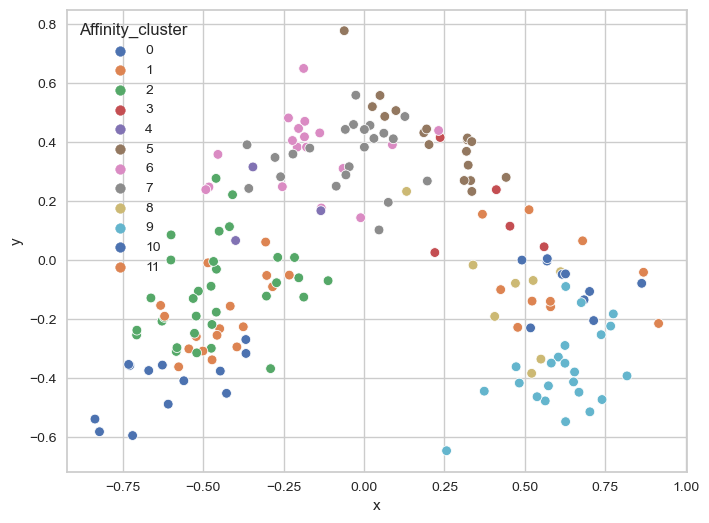

In [53]:
plt.figure(figsize=(8,6)) 
sns.scatterplot(data=projection, x='x', y='y', hue=df["Affinity_cluster"],palette="deep");

# Birch_cluster

In [54]:
from sklearn.cluster import Birch
# define the model
model = Birch(threshold=0.01, n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
Birch_cluster = model.predict(X)
# retrieve unique clusters
Birch_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [55]:
Birch_cluster_sil_avg=silhouette_score(X,Birch_cluster)
Birch_cluster_sil_avg

0.29666794582183303

In [56]:
df["Birch_cluster"]= pd.DataFrame(Birch_cluster)
df

,Kmean_cluster,Agglomerative_Cluster,DBSCAN_cluster,Gaussian_cluster,Meanshift_cluster,Affinity_cluster,Birch_cluster
0,2,2,0,1,0,2,0
1,2,2,0,1,0,1,0
2,2,2,0,1,0,2,0
3,2,2,0,1,0,0,0
4,2,0,0,1,0,2,0
...,...,...,...,...,...,...,...
173,1,1,0,2,0,9,1
174,1,1,0,2,0,9,1
175,1,1,0,2,0,9,1
176,1,1,0,2,0,9,1


In [57]:
df.Birch_cluster.value_counts()

0    128
1     50
Name: Birch_cluster, dtype: int64

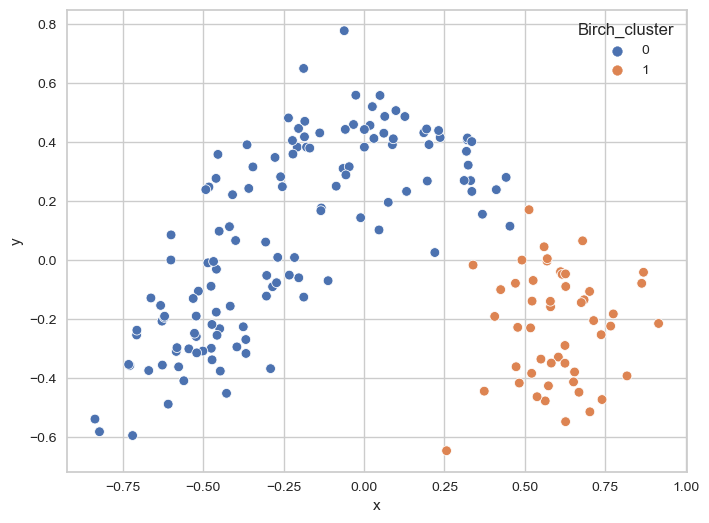

In [58]:
plt.figure(figsize=(8,6)) 
sns.scatterplot(data=projection, x='x', y='y', hue=df['Birch_cluster'],palette="deep");

# Spectral Clustering

In [59]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2)
# fit model and predict clusters
Spectral_Cluster = model.fit_predict(X)
# retrieve unique clusters
Spectral_Cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [60]:
Spectral_sil_avg=silhouette_score(X,Spectral_Cluster)
Spectral_sil_avg

0.2987221815974774

In [61]:
df["Spectral_Cluster"]= pd.DataFrame(Spectral_Cluster)
df

,Kmean_cluster,Agglomerative_Cluster,DBSCAN_cluster,Gaussian_cluster,Meanshift_cluster,Affinity_cluster,Birch_cluster,Spectral_Cluster
0,2,2,0,1,0,2,0,0
1,2,2,0,1,0,1,0,0
2,2,2,0,1,0,2,0,0
3,2,2,0,1,0,0,0,0
4,2,0,0,1,0,2,0,0
...,...,...,...,...,...,...,...,...
173,1,1,0,2,0,9,1,1
174,1,1,0,2,0,9,1,1
175,1,1,0,2,0,9,1,1
176,1,1,0,2,0,9,1,1


In [62]:
df.Spectral_Cluster.value_counts()

0    108
1     70
Name: Spectral_Cluster, dtype: int64

<AxesSubplot:xlabel='x', ylabel='y'>

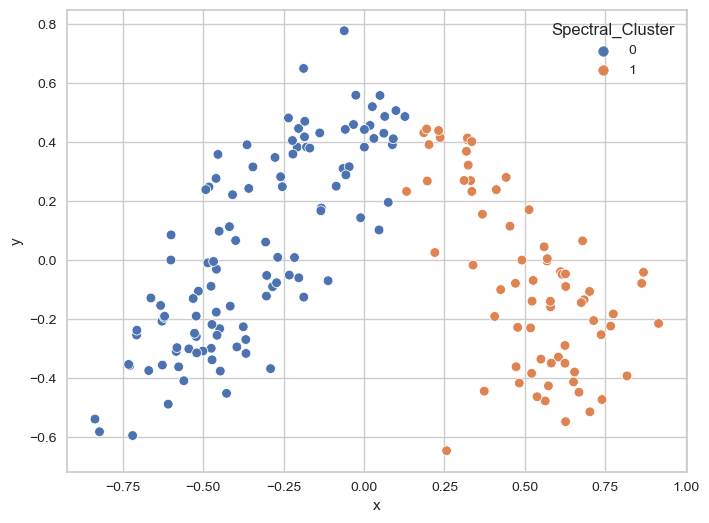

In [63]:
plt.figure(figsize=(8,6)) 
sns.scatterplot(data=projection, x='x', y='y', hue=df['Spectral_Cluster'],palette="deep")

In [64]:
#Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. 
# 1 to -1 is range 1 =best, 0= neutral, -1 =worst

In [70]:
print('kmeans cluster silhouette score', y_kmeans_sil_avg)
print('Agglomerative_Cluster silhouette score',Agglomerative_Cluster_sil_avg)
print('Gaussian_cluster silhouette score ',Gaussian_cluster_sil_avg)
print('Affinity_cluster silhouette score',Affinity_cluster_sil_avg)
print('Birch_cluster silhouette score',Birch_cluster_sil_avg)
print('Spectral cluster  silhouette score',Spectral_sil_avg)
print('\n')
print('Meanshift_cluster silhouette score no clustering happened')
print('DBSCAN_cluster silhouette score no clustering happened')

kmeans cluster silhouette score 0.3008938518500134
Agglomerative_Cluster silhouette score 0.2948290632158541
Gaussian_cluster silhouette score  0.2962530654753313
Affinity_cluster silhouette score 0.11220033737835665
Birch_cluster silhouette score 0.29666794582183303
Spectral cluster  silhouette score 0.2987221815974774


Meanshift_cluster silhouette score no clustering happened
DBSCAN_cluster silhouette score no clustering happened


In [ ]:
#Among them the best clustering algorithm is K Means clustering